# Germany

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/germany.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(41, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,16,0,0,13
2020-02-16,16,0,0,13
2020-02-17,16,0,0,9
2020-02-18,16,0,0,7
2020-02-19,16,0,0,7
2020-02-20,16,0,0,3
2020-02-21,16,0,0,2
2020-02-22,16,0,0,2
2020-02-23,16,0,0,2


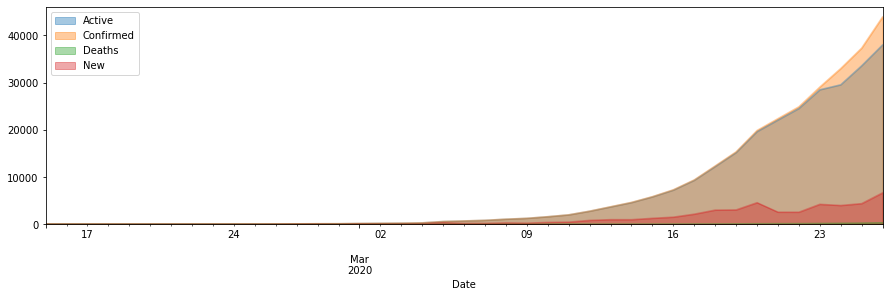

In [6]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)

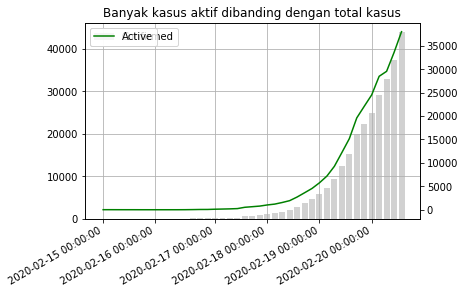

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

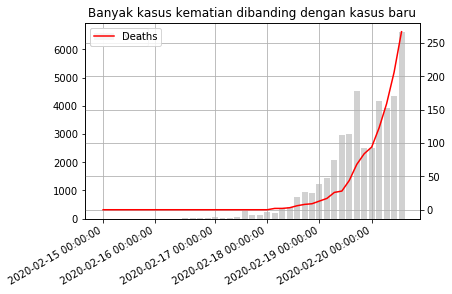

In [8]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 15-Feb-2020
- End: 26-Mar-2020
- Range: 41 Days

**Data**

In [9]:
y = np.array ((13, 13, 9, 7, 7, 3, 2, 2, 2, 2, 3, 11, 32, 58, 63, 114, 149, 187, 246, 528, 652, 782, 1022, 1204, 1545, 1938, 2714, 3621, 4544, 5754, 7188, 9274, 12194, 15161, 19600, 22071, 24513, 28480, 29542, 33570, 37998))
y = y.astype('float64')
y

array([1.3000e+01, 1.3000e+01, 9.0000e+00, 7.0000e+00, 7.0000e+00,
       3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 1.1000e+01, 3.2000e+01, 5.8000e+01, 6.3000e+01,
       1.1400e+02, 1.4900e+02, 1.8700e+02, 2.4600e+02, 5.2800e+02,
       6.5200e+02, 7.8200e+02, 1.0220e+03, 1.2040e+03, 1.5450e+03,
       1.9380e+03, 2.7140e+03, 3.6210e+03, 4.5440e+03, 5.7540e+03,
       7.1880e+03, 9.2740e+03, 1.2194e+04, 1.5161e+04, 1.9600e+04,
       2.2071e+04, 2.4513e+04, 2.8480e+04, 2.9542e+04, 3.3570e+04,
       3.7998e+04])

In [10]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

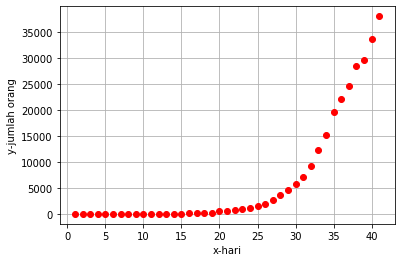

In [11]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [12]:
y = np.array ((13, 13, 9, 7, 7, 3, 2, 2, 2, 2, 3, 11, 32, 58, 63, 114, 149, 187, 246, 528, 652, 782, 1022, 1204, 1545, 1938, 2714, 3621, 4544, 5754, 7188, 9274, 12194, 15161, 19600, 22071, 24513, 28480, 29542, 33570, 37998))
y = y.astype('float64')
y

array([1.3000e+01, 1.3000e+01, 9.0000e+00, 7.0000e+00, 7.0000e+00,
       3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 1.1000e+01, 3.2000e+01, 5.8000e+01, 6.3000e+01,
       1.1400e+02, 1.4900e+02, 1.8700e+02, 2.4600e+02, 5.2800e+02,
       6.5200e+02, 7.8200e+02, 1.0220e+03, 1.2040e+03, 1.5450e+03,
       1.9380e+03, 2.7140e+03, 3.6210e+03, 4.5440e+03, 5.7540e+03,
       7.1880e+03, 9.2740e+03, 1.2194e+04, 1.5161e+04, 1.9600e+04,
       2.2071e+04, 2.4513e+04, 2.8480e+04, 2.9542e+04, 3.3570e+04,
       3.7998e+04])

In [13]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

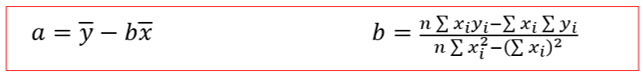

**Membuat xreg untuk plotting selanjutnya**

In [14]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

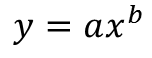

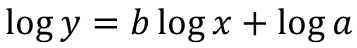

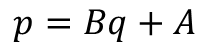

In [15]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [16]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [17]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 3.2016q -1.3164


**Kembalikan ke bentuk pangkat**

In [18]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.0483x^(3.2016)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [19]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.8289 dan r^2 = 0.6871


**Plot**

In [20]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([4.82650115e-02, 6.54869878e-02, 8.65244147e-02, 1.11797694e-01,
       1.41734363e-01, 1.76768653e-01, 2.17341102e-01, 2.63898216e-01,
       3.16892169e-01, 3.76780536e-01, 4.44026046e-01, 5.19096371e-01,
       6.02463924e-01, 6.94605677e-01, 7.96002995e-01, 9.07141483e-01,
       1.02851085e+00, 1.16060475e+00, 1.30392072e+00, 1.45895999e+00,
       1.62622743e+00, 1.80623144e+00, 1.99948383e+00, 2.20649976e+00,
       2.42779764e+00, 2.66389909e+00, 2.91532878e+00, 3.18261444e+00,
       3.46628678e+00, 3.76687938e+00, 4.08492867e+00, 4.42097387e+00,
       4.77555691e+00, 5.14922239e+00, 5.54251756e+00, 5.95599221e+00,
       6.39019866e+00, 6.84569173e+00, 7.32302865e+00, 7.82276907e+00,
       8.34547498e+00, 8.89171068e+00, 9.46204279e+00, 1.00570401e+01,
       1.06772737e+01, 1.13233168e+01, 1.19957448e+01, 1.26951351e+01,
       1.34220674e+01, 1.41771231e+01, 1.49608860e+01, 1.57739418e+01,
       1.66168779e+01, 1.74902840e+01, 1.83947516e+01, 1.93308740e+01,
      

Text(0, 0.5, 'y-banyak orang')

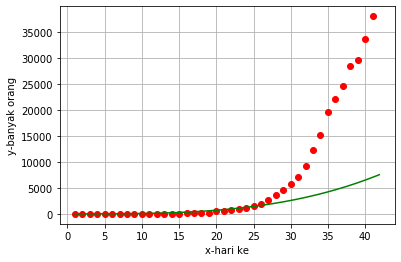

In [21]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

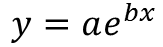

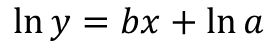

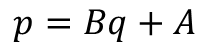

**Linearisasi**

In [22]:
y = np.array ((13, 13, 9, 7, 7, 3, 2, 2, 2, 2, 3, 11, 32, 58, 63, 114, 149, 187, 246, 528, 652, 782, 1022, 1204, 1545, 1938, 2714, 3621, 4544, 5754, 7188, 9274, 12194, 15161, 19600, 22071, 24513, 28480, 29542, 33570, 37998))
y = y.astype('float64')
y

array([1.3000e+01, 1.3000e+01, 9.0000e+00, 7.0000e+00, 7.0000e+00,
       3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 1.1000e+01, 3.2000e+01, 5.8000e+01, 6.3000e+01,
       1.1400e+02, 1.4900e+02, 1.8700e+02, 2.4600e+02, 5.2800e+02,
       6.5200e+02, 7.8200e+02, 1.0220e+03, 1.2040e+03, 1.5450e+03,
       1.9380e+03, 2.7140e+03, 3.6210e+03, 4.5440e+03, 5.7540e+03,
       7.1880e+03, 9.2740e+03, 1.2194e+04, 1.5161e+04, 1.9600e+04,
       2.2071e+04, 2.4513e+04, 2.8480e+04, 2.9542e+04, 3.3570e+04,
       3.7998e+04])

In [23]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

In [24]:
p = np.log(y)
q = x

**Hitung regresi linear**

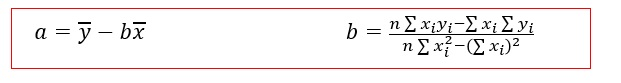

In [25]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [26]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2718q + 0.1665


**Hitung kembali dalam bentuk bilangan berpangkat**

In [27]:
a = np.e**A
b = B

In [28]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.1812x^(0.2718)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [29]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9631 dan r^2 = 0.9275


**Plot data dan regresinya**

In [30]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [31]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([1.18120054e+00, 1.21374173e+00, 1.24717942e+00, 1.28153828e+00,
       1.31684371e+00, 1.35312177e+00, 1.39039927e+00, 1.42870373e+00,
       1.46806346e+00, 1.50850751e+00, 1.55006577e+00, 1.59276893e+00,
       1.63664853e+00, 1.68173698e+00, 1.72806758e+00, 1.77567456e+00,
       1.82459307e+00, 1.87485925e+00, 1.92651023e+00, 1.97958415e+00,
       2.03412022e+00, 2.09015872e+00, 2.14774103e+00, 2.20690970e+00,
       2.26770842e+00, 2.33018210e+00, 2.39437688e+00, 2.46034018e+00,
       2.52812072e+00, 2.59776857e+00, 2.66933516e+00, 2.74287335e+00,
       2.81843747e+00, 2.89608333e+00, 2.97586827e+00, 3.05785122e+00,
       3.14209275e+00, 3.22865507e+00, 3.31760211e+00, 3.40899958e+00,
       3.50291498e+00, 3.59941768e+00, 3.69857896e+00, 3.80047206e+00,
       3.90517223e+00, 4.01275682e+00, 4.12330528e+00, 4.23689928e+00,
       4.35362270e+00, 4.47356176e+00, 4.59680506e+00, 4.72344362e+00,
       4.85357097e+00, 4.98728324e+00, 5.12467918e+00, 5.26586028e+00,
      

Text(0, 0.5, 'y-banyak orang')

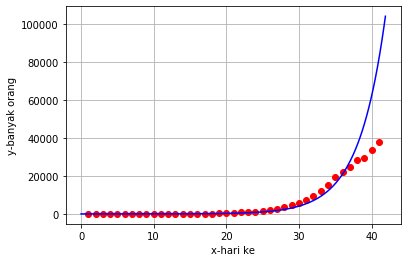

In [32]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [33]:
y = np.array ((13, 13, 9, 7, 7, 3, 2, 2, 2, 2, 3, 11, 32, 58, 63, 114, 149, 187, 246, 528, 652, 782, 1022, 1204, 1545, 1938, 2714, 3621, 4544, 5754, 7188, 9274, 12194, 15161, 19600, 22071, 24513, 28480, 29542, 33570, 37998))
y = y.astype('float64')
y

array([1.3000e+01, 1.3000e+01, 9.0000e+00, 7.0000e+00, 7.0000e+00,
       3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 1.1000e+01, 3.2000e+01, 5.8000e+01, 6.3000e+01,
       1.1400e+02, 1.4900e+02, 1.8700e+02, 2.4600e+02, 5.2800e+02,
       6.5200e+02, 7.8200e+02, 1.0220e+03, 1.2040e+03, 1.5450e+03,
       1.9380e+03, 2.7140e+03, 3.6210e+03, 4.5440e+03, 5.7540e+03,
       7.1880e+03, 9.2740e+03, 1.2194e+04, 1.5161e+04, 1.9600e+04,
       2.2071e+04, 2.4513e+04, 2.8480e+04, 2.9542e+04, 3.3570e+04,
       3.7998e+04])

In [34]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Membentuk regresi polinomial dari matriks**

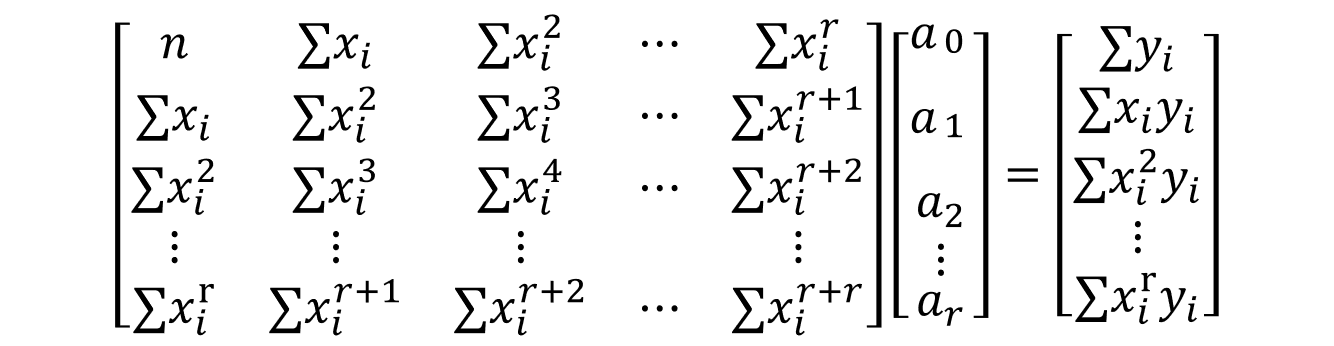

**Mendefinisikan elemen-elemen matriks kiri**

In [35]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 3.02550079e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [36]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[2.64818000e+05],
       [9.63698800e+06],
       [3.55487294e+08],
       [1.32557896e+10]])

**Invers matriks sisi kiri**

In [37]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 4.71264935e-01, -8.50613871e-02,  4.09795596e-03,
        -5.76017906e-05],
       [-8.50613871e-02,  1.95585587e-02, -1.04382586e-03,
         1.55298092e-05],
       [ 4.09795596e-03, -1.04382586e-03,  5.90991836e-05,
        -9.13347631e-07],
       [-5.76017906e-05,  1.55298092e-05, -9.13347631e-07,
         1.44975814e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [38]:
Y = Ainv.dot(B)
print(Y)

[[-1722.06833218]
 [  752.86077811]
 [  -72.25994615]
 [    1.90000533]]


In [39]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [40]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 1.9000x^3 + -72.2599X^2 + 752.8608x + -1722.0683


In [41]:
y

array([1.3000e+01, 1.3000e+01, 9.0000e+00, 7.0000e+00, 7.0000e+00,
       3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 1.1000e+01, 3.2000e+01, 5.8000e+01, 6.3000e+01,
       1.1400e+02, 1.4900e+02, 1.8700e+02, 2.4600e+02, 5.2800e+02,
       6.5200e+02, 7.8200e+02, 1.0220e+03, 1.2040e+03, 1.5450e+03,
       1.9380e+03, 2.7140e+03, 3.6210e+03, 4.5440e+03, 5.7540e+03,
       7.1880e+03, 9.2740e+03, 1.2194e+04, 1.5161e+04, 1.9600e+04,
       2.2071e+04, 2.4513e+04, 2.8480e+04, 2.9542e+04, 3.3570e+04,
       3.7998e+04])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [42]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9968 dan r^2 = 0.9275


**Plot**

Text(0, 0.5, 'y')

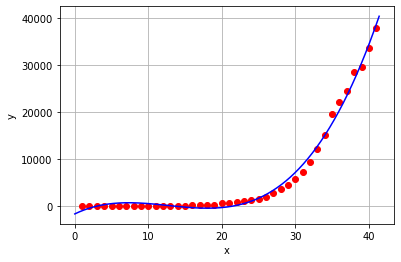

In [43]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

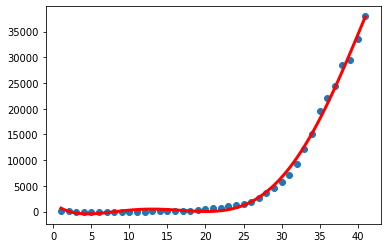

In [44]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [45]:
print (regpoly)

           5         4         3         2
-0.003964 x + 0.431 x - 14.98 x + 212.6 x - 1154 x + 1624


In [46]:
print(r2_score(y, regpoly(x)))

0.9965513851104089


**Selesai**

### Total Death

- Start: 9-Mar-2020
- End: 26-Mar-2020
- Range: 18 Days

**Data**

In [47]:
y = np.array ((2, 2, 3, 6, 8, 9, 13, 17, 26, 28, 44, 68, 84, 94, 123, 159, 206, 267))
y = y.astype('float64')
y

array([  2.,   2.,   3.,   6.,   8.,   9.,  13.,  17.,  26.,  28.,  44.,
        68.,  84.,  94., 123., 159., 206., 267.])

In [48]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

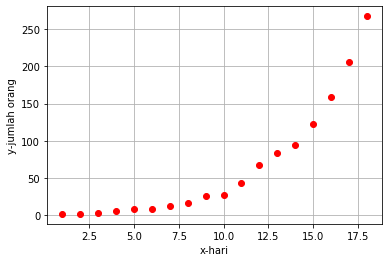

In [49]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [50]:
y = np.array ((2, 2, 3, 6, 8, 9, 13, 17, 26, 28, 44, 68, 84, 94, 123, 159, 206, 267))
y = y.astype('float64')
y

array([  2.,   2.,   3.,   6.,   8.,   9.,  13.,  17.,  26.,  28.,  44.,
        68.,  84.,  94., 123., 159., 206., 267.])

In [51]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])

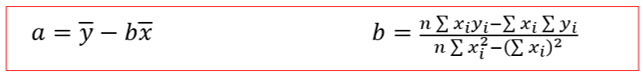

**Membuat xreg untuk plotting selanjutnya**

In [52]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

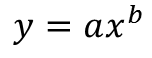

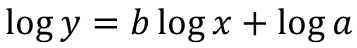

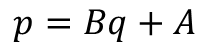

In [53]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [54]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [55]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 1.8756q -0.2400


**Kembalikan ke bentuk pangkat**

In [56]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.5755x^(1.8756)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [57]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9481 dan r^2 = 0.8988


**Plot**

In [58]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([  0.57547983,   0.68812043,   0.81010079,   0.94132019,
         1.08168695,   1.231117  ,   1.3895328 ,   1.5568624 ,
         1.73303878,   1.91799919,   2.11168469,   2.31403974,
         2.52501184,   2.74455122,   2.97261062,   3.209145  ,
         3.45411142,   3.7074688 ,   3.96917782,   4.23920076,
         4.51750138,   4.80404483,   5.09879754,   5.40172713,
         5.71280233,   6.03199295,   6.35926976,   6.69460444,
         7.03796958,   7.38933856,   7.74868555,   8.11598545,
         8.49121386,   8.87434703,   9.26536184,   9.66423579,
        10.07094692,  10.48547382,  10.90779559,  11.33789186,
        11.77574268,  12.22132858,  12.67463053,  13.13562991,
        13.60430848,  14.0806484 ,  14.56463221,  15.05624277,
        15.5554633 ,  16.06227736,  16.5766688 ,  17.0986218 ,
        17.62812081,  18.16515058,  18.70969613,  19.26174274,
        19.82127595,  20.38828156,  20.96274559,  21.54465431,
        22.13399419,  22.73075196,  23.33491451,  23.94

Text(0, 0.5, 'y-banyak orang')

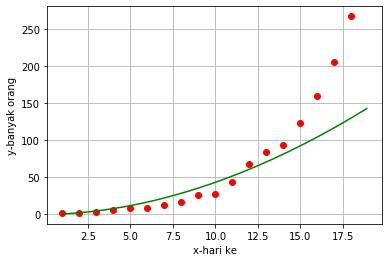

In [59]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

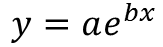

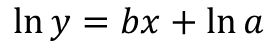

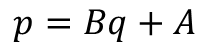

**Linearisasi**

In [60]:
y = np.array ((2, 2, 3, 6, 8, 9, 13, 17, 26, 28, 44, 68, 84, 94, 123, 159, 206, 267))
y = y.astype('float64')
y

array([  2.,   2.,   3.,   6.,   8.,   9.,  13.,  17.,  26.,  28.,  44.,
        68.,  84.,  94., 123., 159., 206., 267.])

In [61]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])

In [62]:
p = np.log(y)
q = x

**Hitung regresi linear**

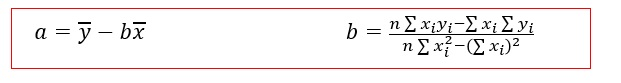

In [63]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [64]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2957q + 0.4303


**Hitung kembali dalam bentuk bilangan berpangkat**

In [65]:
a = np.e**A
b = B

In [66]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.5377x^(0.2957)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [67]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9953 dan r^2 = 0.9906


**Plot data dan regresinya**

In [68]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [69]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([  1.53767236,   1.58382607,   1.63136509,   1.68033101,
         1.73076666,   1.78271615,   1.83622492,   1.89133977,
         1.94810892,   2.006582  ,   2.06681017,   2.12884611,
         2.19274408,   2.25855996,   2.32635133,   2.39617747,
         2.46809947,   2.54218023,   2.61848454,   2.69707916,
         2.77803281,   2.86141631,   2.9473026 ,   3.03576679,
         3.12688625,   3.2207407 ,   3.31741221,   3.41698536,
         3.51954721,   3.6251875 ,   3.73399861,   3.84607572,
         3.96151685,   4.08042299,   4.20289813,   4.32904941,
         4.45898714,   4.59282501,   4.73068005,   4.87267286,
         5.01892762,   5.16957227,   5.32473856,   5.48456221,
         5.64918302,   5.81874497,   5.99339638,   6.17329   ,
         6.35858319,   6.549438  ,   6.74602138,   6.94850528,
         7.15706678,   7.37188833,   7.59315781,   7.82106876,
         8.05582052,   8.29761844,   8.54667399,   8.80320502,
         9.0674359 ,   9.33959776,   9.61992864,   9.90

Text(0, 0.5, 'y-banyak orang')

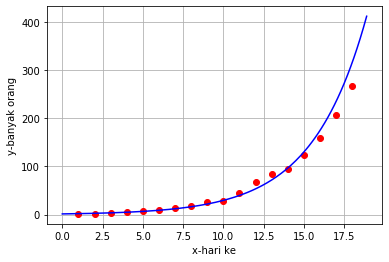

In [70]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [71]:
y = np.array ((2, 2, 3, 6, 8, 9, 13, 17, 26, 28, 44, 68, 84, 94, 123, 159, 206, 267))
y = y.astype('float64')
y

array([  2.,   2.,   3.,   6.,   8.,   9.,  13.,  17.,  26.,  28.,  44.,
        68.,  84.,  94., 123., 159., 206., 267.])

In [72]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18.])

**Membentuk regresi polinomial dari matriks**

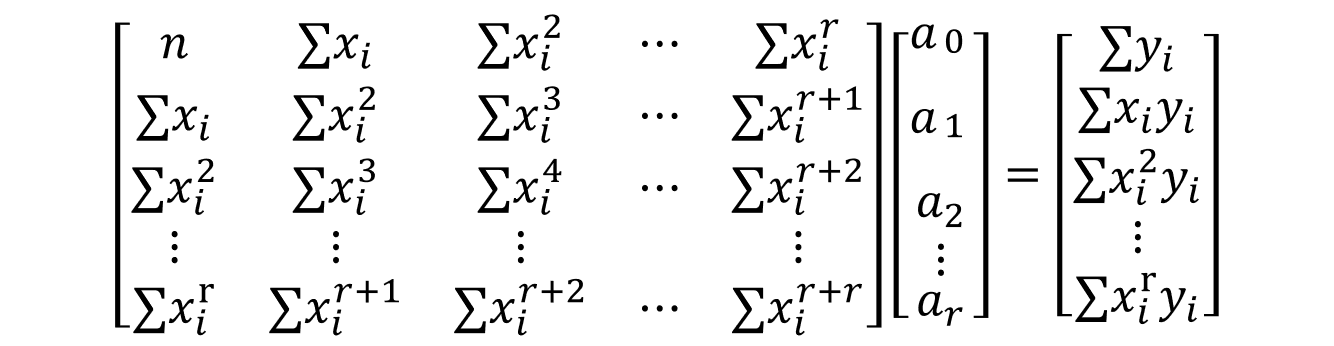

**Mendefinisikan elemen-elemen matriks kiri**

In [73]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[1.80000000e+01, 1.71000000e+02, 2.10900000e+03, 2.92410000e+04],
       [1.71000000e+02, 2.10900000e+03, 2.92410000e+04, 4.32345000e+05],
       [2.10900000e+03, 2.92410000e+04, 4.32345000e+05, 6.65720100e+06],
       [2.92410000e+04, 4.32345000e+05, 6.65720100e+06, 1.05409929e+08]])

**Mendefinisikan elemen-elemen matriks kanan**

In [74]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[1.159000e+03],
       [1.727900e+04],
       [2.694450e+05],
       [4.317707e+06]])

**Invers matriks sisi kiri**

In [75]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 1.39052288e+00, -5.60185185e-01,  6.04575163e-02,
        -1.90631808e-03],
       [-5.60185185e-01,  2.73518423e-01, -3.21350763e-02,
         1.06304705e-03],
       [ 6.04575163e-02, -3.21350763e-02,  3.97746818e-03,
        -1.36165577e-04],
       [-1.90631808e-03,  1.06304705e-03, -1.36165577e-04,
         4.77773956e-06]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [76]:
Y = Ainv.dot(B)
print(Y)

[[-8.77124183]
 [ 8.16027405]
 [-1.40587375]
 [ 0.09871288]]


In [77]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [78]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.0987x^3 + -1.4059X^2 + 8.1603x + -8.7712


In [79]:
y

array([  2.,   2.,   3.,   6.,   8.,   9.,  13.,  17.,  26.,  28.,  44.,
        68.,  84.,  94., 123., 159., 206., 267.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [80]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9978 dan r^2 = 0.9906


**Plot**

Text(0, 0.5, 'y')

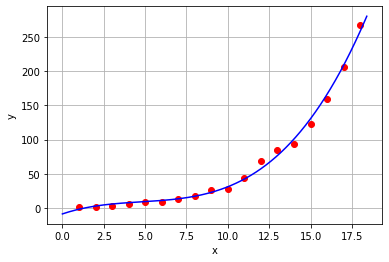

In [81]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

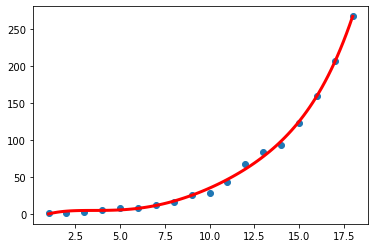

In [82]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [83]:
print (regpoly)

          5           4          3         2
0.001048 x - 0.04318 x + 0.7011 x - 4.633 x + 13.34 x - 8.974


In [84]:
print(r2_score(y, regpoly(x)))

0.9981192764658658


**Selesai**